In [13]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [14]:
# Load dataset
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

print(train_data)
print(test_data)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
# Exploratory Data Analysis
print('Train dataset exploratory:')
print('---------------------------')
print('Shape of train_set:', train_data.shape, '\n')
print('Columns of train_set:', train_data.columns, '\n')
print('DataTypes of train_set:', train_data.dtypes, '\n')
print('NaN values of train_set', train_data.isna().sum())
print('---------------------------')
print('\n')

print('Test dataset exploratory:')
print('---------------------------')
print('Shape of test_set:', test_data.shape, '\n')
print('Columns of test_set:', test_data.columns, '\n')
print('DataTypes of test_set:', test_data.dtypes, '\n')
print('NaN values of test_set', test_data.isna().sum())
print('---------------------------')
print('\n')

Train dataset exploratory:
---------------------------
Shape of train_set: (8693, 14) 

Columns of train_set: Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') 

DataTypes of train_set: PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object 

NaN values of train_set PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0


In [16]:
# Target value distribution

target = train_data['Transported']
print(train_data.groupby('HomePlanet')['Transported'].mean(), '\n')
print(train_data.groupby('CryoSleep')['Transported'].mean(), '\n')
print(train_data.groupby('Destination')['Transported'].mean(), '\n')
print(train_data.groupby('VIP')['Transported'].mean(), '\n')

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64 

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64 

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64 

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64 



#### Below histograms how many transported across different categorical columns.

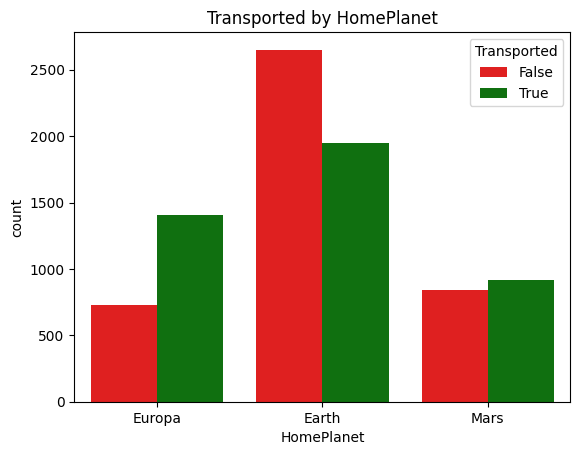

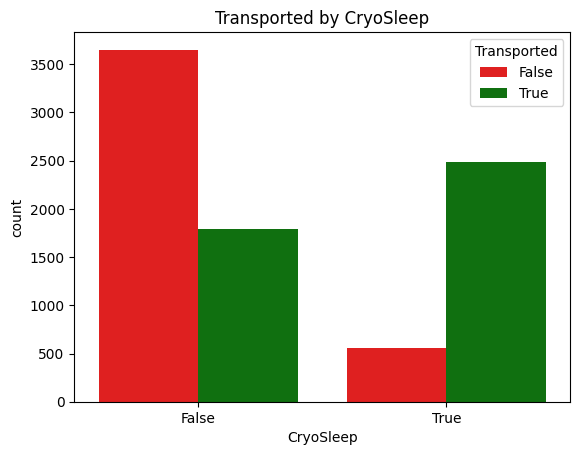

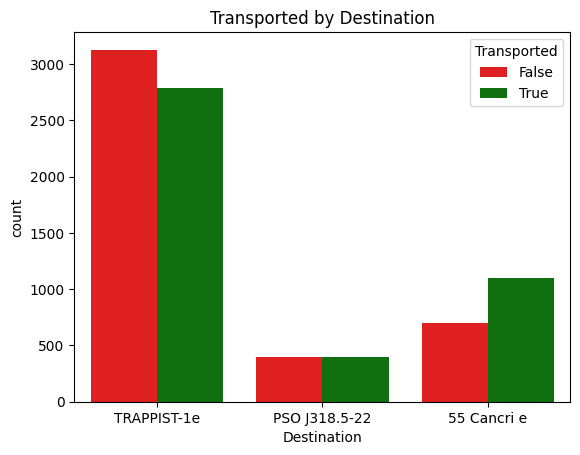

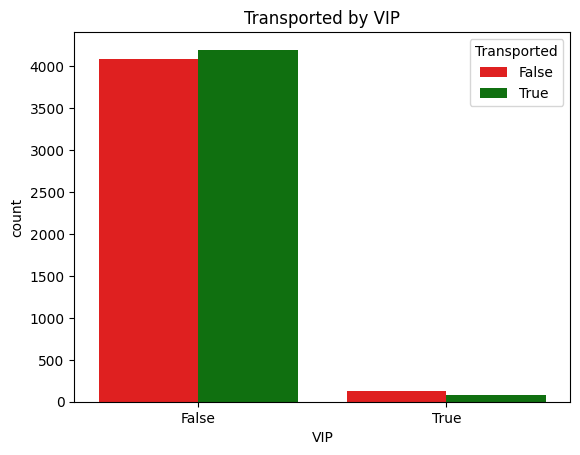

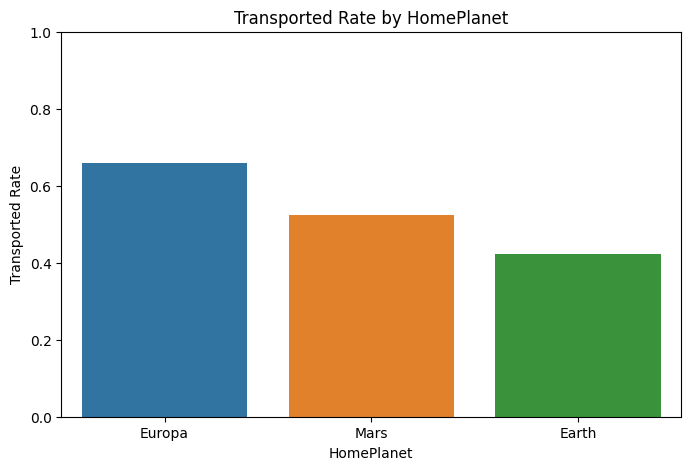

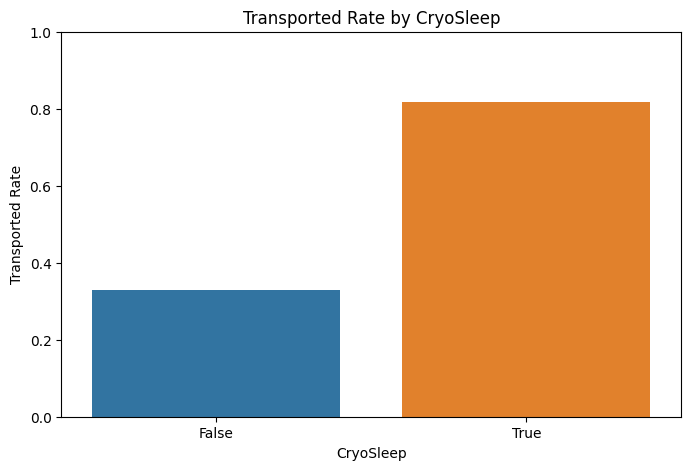

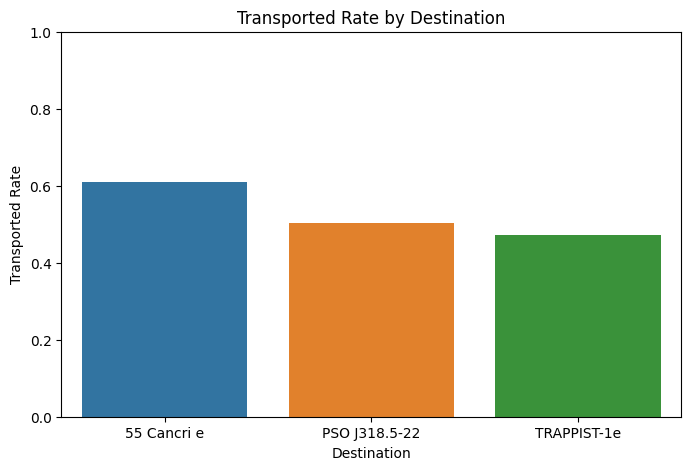

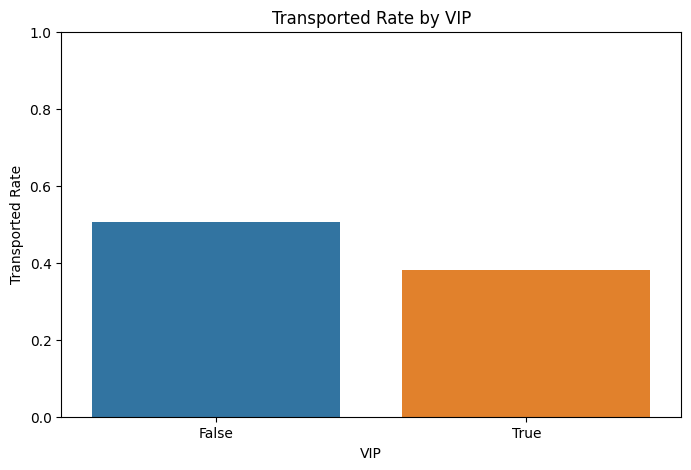

In [17]:
# Plot histograms for categorical X features - Y target in train_dataset.

import matplotlib.pyplot as plt
import seaborn as sns

labels = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for label in labels:
    sns.countplot(data = train_data, x= label, hue='Transported', palette = ['Red', 'Green'])
    plt.title(f'Transported by {label}')
    plt.show()
    
for label in labels:
    data_rates = (train_data.groupby(label)['Transported']
    .mean()
    .reset_index()
    .sort_values("Transported", ascending=False))

    plt.figure(figsize=(8, 5))
    sns.barplot(data=data_rates, x= label, y="Transported")
    plt.title(f"Transported Rate by {label}")
    plt.ylabel("Transported Rate")
    plt.ylim(0, 1)  # because it's a proportion
    plt.show()

In [18]:
# Correlation of numeric X features - Y target in train_dataset.
numeric_cols = train_data.select_dtypes(include='number')
for col in numeric_cols:
    print(f'Correlation of {col} with target:', train_data[col].corr(train_data['Transported']))

Correlation of Age with target: -0.07502558362232602
Correlation of RoomService with target: -0.24461142158527602
Correlation of FoodCourt with target: 0.046566393764722026
Correlation of ShoppingMall with target: 0.010140890024277174
Correlation of Spa with target: -0.22113134924572855
Correlation of VRDeck with target: -0.20707538958428995


In [19]:
# Check distribution of X features.
# skew > 0 -> many high values, tail on the left
# skew < 0 -> many low values, tail on the right
# skew ~= 0 -> summetric, normal distribution
cols = ['RoomService', 'FoodCourt','ShoppingMall','Spa', 'VRDeck']
for col in cols:
    print(f'Skew for {col}:', train_data[col].skew(), '\n')

Skew for RoomService: 6.333014062092136 

Skew for FoodCourt: 7.102227852514116 

Skew for ShoppingMall: 12.62756203889759 

Skew for Spa: 7.636019884712421 

Skew for VRDeck: 7.819731592048683 



Heavy positive skew, we have many low values in luxury expenses.

In [20]:
# Preprocess engineering

def preprocess_df(df: pd.DataFrame):
    df = df.copy()

    for c in ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']:
        if c in df.columns:
            # convert to string then strip; leave NaNs as-is
            df[c] = df[c].astype('string').str.strip()

    # create boolean flags for missing values, so we dont miss the information after fillna().
    cols_with_na = [c for c in df.columns if df[c].isna().any()]
    for c in cols_with_na:
        df[f"{c}_was_missing"] = df[c].isna().astype(int)

    # luxury expenses have positive skew, so mean() would be affected more from outliers than median().
    cols = ['RoomService', 'FoodCourt','ShoppingMall','Spa', 'VRDeck']
    for col in cols:
        df[col] = df[col].fillna(df[col].median())
    
    #Age has skew around 0, so for normal distribution using mean() is more meaningful.
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    #Fill NaN in categorical features with most frequent value.
    cat_cols = ['HomePlanet','CryoSleep','Destination','VIP']
    
    for c in cat_cols:
        mode_val = df[c].mode(dropna=True).iloc[0]
        df[c] = df[c].fillna(mode_val)
    
    # Split Cabin into 3 parts .../.../... and create CabinNum, Deck, Side.
    df["Cabin"] = df["Cabin"].str.strip()
    cabin_parts = df["Cabin"].str.split("/", n=2, expand=True)
    df["Deck"] = cabin_parts[0]
    df["CabinNum"] = pd.to_numeric(cabin_parts[1], errors="coerce").astype("Int64")
    df["Side"] = cabin_parts[2]

    # We don't need Cabin anymore.
    df = df.drop('Cabin', axis=1)
    
    df['HomePlanet'] = df['HomePlanet'].astype('string').str.strip()
    mode_deck = {'Earth': 'G', 'Europa': 'B', 'Mars': 'F'}
    
    # 3) Fill only the rows missing Deck, and only where HomePlanet is known
    mask = df['Deck'].isna() & df['HomePlanet'].notna()
    df.loc[mask, 'Deck'] = df.loc[mask, 'HomePlanet'].map(mode_deck)

    # Fallback filler for NaNs.
    df['Deck'] = df['Deck'].fillna('Unknown')

    # Fill NaNs in Side with most frequent Side for given Deck.
    deck_to_side = (
        df.dropna(subset=['Deck', 'Side'])
        .groupby('Deck')['Side']
        .agg(lambda s: s.mode().iloc[0])
        .to_dict()
    )
    # 3) Fill only the rows missing Side, and only where Deck is known
    mask = df['Side'].isna() & df['Deck'].notna()
    df.loc[mask, 'Side'] = df.loc[mask, 'Deck'].map(deck_to_side)
    
    # Fallback filler for NaNs.
    df['Side'] = df['Side'].fillna('Unknown')
    
    df['CabinNum'] = df['CabinNum'].astype('Float64')

    # Fill NaNs in CabinNum with median for known Deck,Side
    grp_median_ds = (
        df.groupby(['Deck', 'Side'])['CabinNum']
          .transform('median')   # float64
    )
    
    df['CabinNum'] = df['CabinNum'].fillna(grp_median_ds)
    
    # optional global fallback
    df['CabinNum'] = df['CabinNum'].fillna(df['CabinNum'].median())
    
    # finally make it integer again
    df['CabinNum'] = df['CabinNum'].round().astype('Int64')
    
    # Split PassengerId to two parts ..._... and keep only the Surname for some meaningful data (Same Surname -> Family)
    pass_parts = df["PassengerId"].str.split("_", n=1, expand=True)
    df['PassGroup'] = pass_parts[0]
    
    names = df['Name'].str.split()
    df['Name'] = names.str[-1]
    
    
    def safe_name_mode(s: pd.Series):
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) else np.nan
    
    group_mode_name = (
        df.groupby('PassGroup')['Name']
                  .agg(safe_name_mode)
    )

    # Fill NaNs in Name with the most frequent Surname in given PassGroup as they are likely to be family
    mask = df['Name'].isna()
    df.loc[mask, 'Name'] = df.loc[mask, 'PassGroup'].map(group_mode_name)
    
    # 3) fallback for groups where everyone was missing in the specific PassGroup
    df['Name'] = df['Name'].fillna('Unknown')
    
    
    #create combined fields
    df['TotalExpenses'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    df['HasSpent'] = (df['TotalExpenses'] > 0).astype(int)
    
    
    
    df['FamilySize'] = df.groupby('PassGroup')['PassengerId'].transform('count')
    df['IsFamily'] = (df['FamilySize'] > 1).astype(int)

    df = df.drop(['Name', 'PassGroup'], axis=1)

    return df

In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Split X/y and drop ID
train = preprocess_df(train_data)
X_test  = preprocess_df(test_data)

test_ids = X_test['PassengerId'].copy()#for sumbission.csv
X_test  = X_test.drop(columns=['PassengerId'])
y_train = train['Transported']
X_train = train.drop(columns=['Transported', 'PassengerId'])

# Map binary strings -> 0/1 (robust to 'True'/'False'/bool/NaN)
for c in ['CryoSleep', 'VIP']:
    if c in X_train.columns:
        X_train[c] = X_train[c].astype(str).str.lower().map({'true': 1, 'false': 0}).astype('Int64')
        X_test[c]  = X_test[c].astype(str).str.lower().map({'true': 1, 'false': 0}).astype('Int64')

# Categorical to one-hot
cat_cols = [c for c in ['HomePlanet','Destination','Deck','Side'] if c in X_train.columns]

#Column Transform performs one hot encoding to each cat_col independently and then concat them horizontally.
preproc = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Creates pipeline of transformer and ML model
rf = Pipeline(steps=[
    ('preproc', preproc), #transform row categorical data using one hot encoding and passes through the rest.
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))]) #model trained on transformed data.



In [22]:
# Fine Tuning Random Forest hyperparameters
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__n_estimators': randint(100,401), #how many decision trees will be created. typically default 100 ~ 150 works fine.
    'model__max_depth': [6, 8, 10, None], #max depth of trees -> very big depth -> overfitting
    'model__min_samples_split': randint(3,16), #number of minimum samples for splitting data to below subtrees.
    'model__min_samples_leaf': randint(2,9) #number of minimum samples in a leaf
}

#We prefer RandomizedSearchCV over GridSearchCV for speed. GridSearch CV is an exhausting procedure combining all the possible parameters to evaluate a model.
search = RandomizedSearchCV(
    rf, param_grid, n_iter=30, cv=3, scoring='accuracy',
    n_jobs=-1, random_state=42, verbose=1
)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)
print("Best CV score:", search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'model__max_depth': None, 'model__min_samples_leaf': 8, 'model__min_samples_split': 13, 'model__n_estimators': 180}
Best CV score: 0.7891421116646612


In [23]:
best_model = search.best_estimator_ #best accuracy combination of parameters

test_preds = best_model.predict(X_test).astype(bool)  

submission = pd.DataFrame({
    'PassengerId': test_ids,   # saved earlier from test['PassengerId']
    'Transported': test_preds
})
submission.to_csv('submission.csv', index=False)
print('Saved submission.csv')

Saved submission.csv


In [25]:
# We can quickly check overfitting with accuracy in whole training dataset (usually accuracy ~= 1 means overfitting).
# Then we can split our dataset to see the  of the model.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

best_model.fit(X_tr, y_tr)
y_pred =best_model.predict(X_val)

print("Validation accuracy:", accuracy_score(y_val, y_pred))
print("Confusion matrix:", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, digits=4))

Validation accuracy: 0.7998849913743531
Confusion matrix: [[683 180]
 [168 708]]
              precision    recall  f1-score   support

       False     0.8026    0.7914    0.7970       863
        True     0.7973    0.8082    0.8027       876

    accuracy                         0.7999      1739
   macro avg     0.7999    0.7998    0.7998      1739
weighted avg     0.7999    0.7999    0.7999      1739



In [26]:
# F1-Score : balance between recall and precision.
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='binary')

0.802721088435374